<a href="https://colab.research.google.com/github/Ankit-githb/Week-8-Fitbit-data-analysis/blob/main/Week_8_FitbitDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ankit Kumar Week 8th project**
# **Introduction :**
we embarked on an insightful journey into the FitBit Fitness Tracker App data through a distributed survey conducted on Amazon Mechanical Turk. Our exploration, spanning from March 12, 2016, to May 12, 2016, involved thirty willing Fitbit users who generously shared minute-level data on physical activity, heart rate, and sleep monitoring. With a toolbox comprising Python, Pandas, and Pandas Profiling, we delved into 18 diverse files like dailyActivity and hourlySteps, aiming to unveil user trends and patterns.

## **EDA PROCESS**

<span style="font-size:1.1em;">We will begin this phase by loading the libraries and datasets that are going to be used. Then, we will perform data exploration by getting an overview of the datasets, checking the data types, gathering a statistics summary, as well as cleaning the data.

<br>
    
**<span style="font-size:1.3em;">Loading libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype

**<span style="font-size:1.3em;">Loading datasets**

In [2]:
daily_activity = pd.read_csv('/content/dailyActivity_merged.csv')

weight_info = pd.read_csv('/content/weightLogInfo_merged.csv')

sleep_day = pd.read_csv('/content/sleepDay_merged.csv')

hourly_steps = pd.read_csv('/content/hourlySteps_merged.csv')

hourly_calories = pd.read_csv('/content/hourlyCalories_merged.csv')

**<span style="font-size:1.4em;">Data Exploration**

**<span style="font-size:1.2em;">Getting an overview of the data**

<span style="font-size:1.1em;">Let's start by first taking a look into our datasets:<br>

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
weight_info.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [5]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [7]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


**<span style="font-size:1.3em;">Checking the data types in each dataset**

<span style="font-size:1.1em;">Now, it is important that we check the data types we will be working with:<br>

In [8]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [9]:
weight_info.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [10]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [11]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [12]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

**<span style="font-size:1.3em;">Summary**


    
<span style="font-size:1.1em;">**Lets find the unique participants are there in each dataframe?**

In [13]:
daily_activity.Id.nunique()

33

In [14]:
weight_info.Id.nunique()

8

In [16]:
sleep_day.Id.nunique()

24

In [15]:
hourly_steps.Id.nunique()

33

In [17]:
hourly_calories.Id.nunique()

33

<span style="font-size:1.1em;">By looking at the results above, we can conclude that not all 33 participants have logged their weight or sleep information on the app.

<span style="font-size:1.1em;">The fact that the **weight** dataset only contains information from eight users could be a problem when it comes to making recommendations for the general public. Those users may not adequately represent the population, which could lead to biased results. For this reason, let's exclude this dataset in the analysis.

<span style="font-size:1.1em;">**Number of rows and columns in each dataframe?**

In [18]:
daily_activity.shape

(940, 15)

In [19]:
sleep_day.shape

(413, 5)

In [20]:
hourly_steps.shape

(22099, 3)

In [21]:
hourly_calories.shape

(22099, 3)

**<span style="font-size:1.2em;">Checking some more info of our datasets**

**<span style="font-size:1.2em;">daily_activity**

In [22]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


**<span style="font-size:1.2em;">sleep_day**

In [23]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


**<span style="font-size:1.2em;">hourly_steps**

In [24]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


**<span style="font-size:1.2em;">hourly_calories**

In [25]:
hourly_calories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


**<span style="font-size:1.6em;">Data Cleaning**

<span style="font-size:1.1em;">Now, it is time to make sure our data is clean and tidy.

**<span style="font-size:1.3em;">Checking for empty cells**

In [26]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [27]:
sleep_day.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [28]:
hourly_steps.isnull().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

In [29]:
hourly_calories.isnull().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

**<span style="font-size:1.3em;">Looking for duplicate values**

In [30]:
daily_activity.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [31]:
sleep_day.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
408    False
409    False
410    False
411    False
412    False
Length: 413, dtype: bool

In [32]:
hourly_steps.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [33]:
hourly_calories.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

<span style="font-size:1.1em;">No duplicate rows found.

## **ANALYZE**

<span style="font-size:1.1em;">Now, we will perform data transformation, change data formatting if necessary, and merge datasets in order to perform analysis. We will also aggregate and group data to perform calculations and answer questions, such as the average of total steps by day of the week, the average number of daily steps taken by the user, and the most active time of day.

**<span style="font-size:1.6em;">Data Transformation**

<span style="font-size:1.1em;">In this step, we will transform certain aspects of the data in order to analyze them.

**<span style="font-size:1.3em;">Renaming the date column**

<span style="font-size:1.1em;">The date column is named differently across the datasets. Let's rename them to make it easier for when we merge the datasets later.

In [34]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

sleep_day = sleep_day.rename(columns={'SleepDay': 'Date'})

hourly_steps = hourly_steps.rename(columns={'ActivityHour' : 'Time'})

hourly_calories = hourly_calories.rename(columns={'ActivityHour' : 'Time'})

**<span style="font-size:1.3em;">Changing data formatting**

<span style="font-size:1.1em;">Looking at the outputs above, we can see that the date column in all dataframes are of type object. We need to change the data type to datetime to perform calculations.

In [35]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

sleep_day['Date'] = pd.to_datetime(sleep_day['Date'])

hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'])

hourly_calories['Time'] = pd.to_datetime(hourly_calories['Time'])

**<span style="font-size:1.3em;">Creating a day of the week column**

<span style="font-size:1.1em;">We can create a day of the week column deriving from the date column so we can better analyze our data.

In [36]:
daily_activity['DayOfWeek'] = daily_activity['Date'].dt.day_name()

hourly_steps['DayOfWeek'] = hourly_steps['Time'].dt.day_name()

**<span style="font-size:1.3em;">Merging datasets**

<span style="font-size:1.1em;">Combining some of our datasets can make the analysis process easier and help us find trends in our data. This process is similar to Joints in SQL.

In [37]:
# Merging daily_activity and sleep_day datasets
data_merged = pd.merge(daily_activity, sleep_day, on='Date')

# Renaming certain columns for readability
data_merged = data_merged.rename(columns={'Id_x' : 'Id_Activity'})
data_merged = data_merged.rename(columns={'Id_y' : 'Id_Sleep'})
data_merged.head()

,Id_Activity,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Id_Sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,4020332650,1,501,541


In [38]:
# Merging hourly_steps and hourly_calories datasets
hourly_merged = pd.merge(hourly_steps, hourly_calories, on=['Time', 'Id'])
hourly_merged.head()

,Id,Time,StepTotal,DayOfWeek,Calories
0,1503960366,2016-04-12 00:00:00,373,Tuesday,81
1,1503960366,2016-04-12 01:00:00,160,Tuesday,61
2,1503960366,2016-04-12 02:00:00,151,Tuesday,59
3,1503960366,2016-04-12 03:00:00,0,Tuesday,47
4,1503960366,2016-04-12 04:00:00,0,Tuesday,48


<span style="font-size:1.1em;">Let's find out how many days were recorded on this dataframe:

In [39]:
hourly_merged['Time'].max() - hourly_merged['Time'].min()

Timedelta('30 days 15:00:00')

<span style="font-size:1.1em;">Looks like we have 30 days worth of total number of steps and burned calories. This dataframe should help us find some interesting trends.

**<span style="font-size:1.5em;">Activity Data**

<span style="font-size:1.1em;">We will begin by taking a closer look on more specific information surrounding our users activity.

<br>
    
**<span style="font-size:1.2em;">Analyzing the Average of Total Steps and Calories**

<span style="font-size:1.1em;">How many steps do our users take daily? How many calories do they burn on average?

In [40]:
daily_activity.agg(
    {'TotalSteps': ['mean', 'min', 'max'],
     'Calories': ['mean', 'min', 'max'],
    })

,TotalSteps,Calories
mean,7637.910638,2303.609574
min,0.000000,0.000000
max,36019.000000,4900.000000


<span style="font-size:1.1em;">The average of total daily steps by the users is **7,638 steps**.



**<span style="font-size:1.2em;">Analyzing the Average of Total Steps by Day of the Week**



In [41]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data_merged['DayOfWeek'] = data_merged['DayOfWeek'].astype(cat_type)
df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)
df_weekday.filter(['TotalSteps'])

<ipython-input-41-89bbe5278f4d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)


,TotalSteps
DayOfWeek,
Monday,7755.040426
Tuesday,8115.021662
Wednesday,7593.504995
Thursday,7651.824517
Friday,7449.285319
Saturday,8159.764314
Sunday,6943.197226


**<span style="font-size:1.2em;">Analyzing the Most Active Time of Day**

<span style="font-size:1.1em;">What are the most active hours of the users' day on average?
Are they occurring during the day or at night?

In [42]:
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean()


Time
0      42.188437
1      23.102894
2      17.110397
3       6.426581
4      12.699571
5      43.869099
6     178.508056
7     306.049409
8     427.544576
9     433.301826
10    481.665231
11    456.886731
12    548.642082
13    537.698154
14    540.513572
15    406.319126
16    496.845645
17    550.232892
18    599.169978
19    583.390728
20    353.905077
21    308.138122
22    237.987832
23    122.132890
Name: StepTotal, dtype: float64

**<span style="font-size:1.2em;">Analyzing the Time of Day Users Burn the Most Calories**
    
<span style="font-size:1.1em;">When are the users burning the most calories? In the morning, afternoon, or night?

In [43]:
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean()

Time
0      71.805139
1      70.165059
2      69.186495
3      67.538049
4      68.261803
5      81.708155
6      86.996778
7      94.477981
8     103.337272
9     106.142857
10    110.460710
11    109.806904
12    117.197397
13    115.309446
14    115.732899
15    106.637158
16    113.327453
17    122.752759
18    123.492274
19    121.484547
20    102.357616
21     96.056354
22     88.265487
23     77.593577
Name: Calories, dtype: float64

**<span style="font-size:1.2em;">Analyzing the Different Categories of Activity**

<span style="font-size:1.1em;">How active are the users throughout the day? Do they spend a significant portion of their day being very active or, perhaps, not active enough?

In [44]:
daily_activity.agg(
    {'VeryActiveMinutes': ['mean', 'min', 'max'],
     'FairlyActiveMinutes': ['mean', 'min', 'max'],
     'LightlyActiveMinutes': ['mean', 'min', 'max'],
     'SedentaryMinutes': ['mean', 'min', 'max'],
    })

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
mean,21.164894,13.564894,192.812766,991.210638
min,0.000000,0.000000,0.000000,0.000000
max,210.000000,143.000000,518.000000,1440.000000


**<span style="font-size:1.2em;">Analyzing the Average of Minutes Spent in Each Activity Category**
    
<span style="font-size:1.1em;">Let's analyze how our users are spending their day on average.

In [45]:
minutes_categories = data_merged[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories

VeryActiveMinutes        21.265822
FairlyActiveMinutes      13.660436
LightlyActiveMinutes    194.197545
SedentaryMinutes        992.791446
dtype: float64

**<span style="font-size:1.5em;">Sleep Data**

<span style="font-size:1.1em;">Now, let's look into users' sleeping habits.

**<span style="font-size:1.2em">Analyzing the Average of Total Minutes Asleep and Total Time in Bed**

In [46]:
sleep_day.agg(
    {'TotalMinutesAsleep': ['mean', 'min', 'max'],
     'TotalTimeInBed': ['mean', 'min', 'max'],
    })

,TotalMinutesAsleep,TotalTimeInBed
mean,419.467312,458.639225
min,58.000000,61.000000
max,796.000000,961.000000


**<span style="font-size:1.2em">Analyzing the Average of Minutes Asleep by Day of the Week**
    
<span style="font-size:1.1em;">We can group the data to find out how much sleep, on average, the users are getting throughout the week.

In [47]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data_merged['DayOfWeek'] = data_merged['DayOfWeek'].astype(cat_type)
df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)
df_weekday.filter(['TotalMinutesAsleep'])

<ipython-input-47-a7039ee0cb1b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)


,TotalMinutesAsleep
DayOfWeek,
Monday,418.245390
Tuesday,404.815617
Wednesday,434.566434
Thursday,401.504069
Friday,405.504155
Saturday,420.766537
Sunday,453.702051


**<span style="font-size:1.2em;">Analyzing the Average of Awake Time in Bed by Day of the Week**

<span style="font-size:1.1em;">Now, let's take a look at how much time the users are spending in bed without being asleep throughout the week.

In [48]:
df_weekday.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])
df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed']]
df_weekday['AwakeTimeInBed'] = df_weekday['TotalTimeInBed'] - df_weekday['TotalMinutesAsleep']
time_bed = df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed', 'AwakeTimeInBed']]
time_bed

,TotalMinutesAsleep,TotalTimeInBed,AwakeTimeInBed
DayOfWeek,,,
Monday,418.245390,455.711348,37.465957
Tuesday,404.815617,443.471033,38.655416
Wednesday,434.566434,470.421578,35.855145
Thursday,401.504069,435.150560,33.646490
Friday,405.504155,445.150693,39.646537
Saturday,420.766537,461.246804,40.480267
Sunday,453.702051,504.556695,50.854644


In [49]:
# Average Awake Time in Bed
time_bed['AwakeTimeInBed'].mean()

39.514922373626526

<span style="font-size:1.1em;">The users spent, on average, 39.5 minutes awake in bed.

## **VISUALIZE**

<span style="font-size:1.1em;">We will now visualize the information we have discovered through our analysis.

**<span style="font-size:1.2em;">Visualizing Total Steps and Calories**

<span style="font-size:1.1em;">Let's take a look at the relationship between the total number of steps and calories:
  

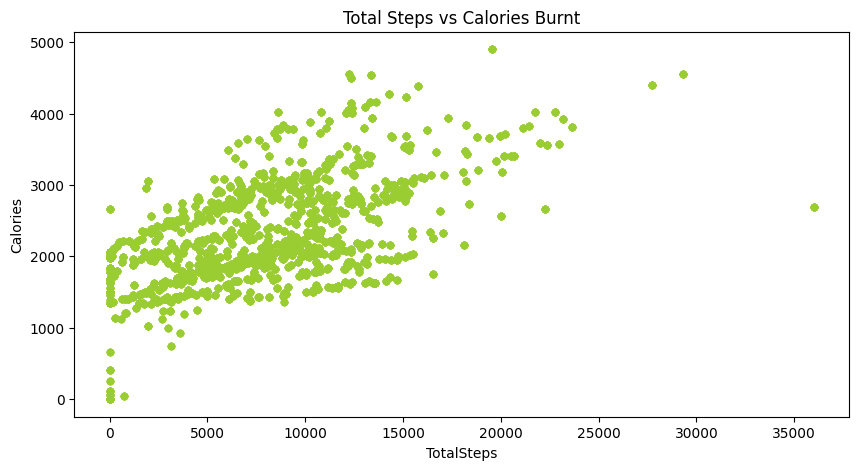

In [53]:
data_merged.plot.scatter(x='TotalSteps', y='Calories', color='yellowgreen', alpha=0.7, figsize=(10,5))
plt.title('Total Steps vs Calories Burnt')
plt.show()

**<span style="font-size:1.2em;"> Visualizing the Average of Total Steps by Day of the Week**

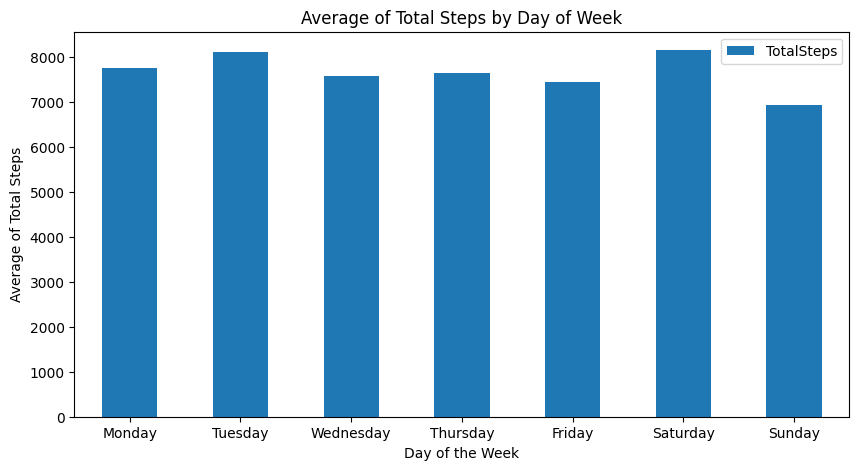

In [56]:
df_weekday['TotalSteps'].plot.bar(xlabel='Day of the Week', ylabel='Average of Total Steps', title='Average of Total Steps by Day of Week', legend=True, rot=0, figsize=(10,5))
plt.show()

<span style="font-size:1.1em;">This graph shows us the average total steps taken by the users throughout the week. We can see that the most active day in terms of steps taken is Saturday, followed by Tuesday. The least active day is Sunday - most likely a rest day for the users. This visualization shows us that the users seem to be consistent with their total steps scores.

**<span style="font-size:1.2em;"> Visualizing the Most Active Time of Day**


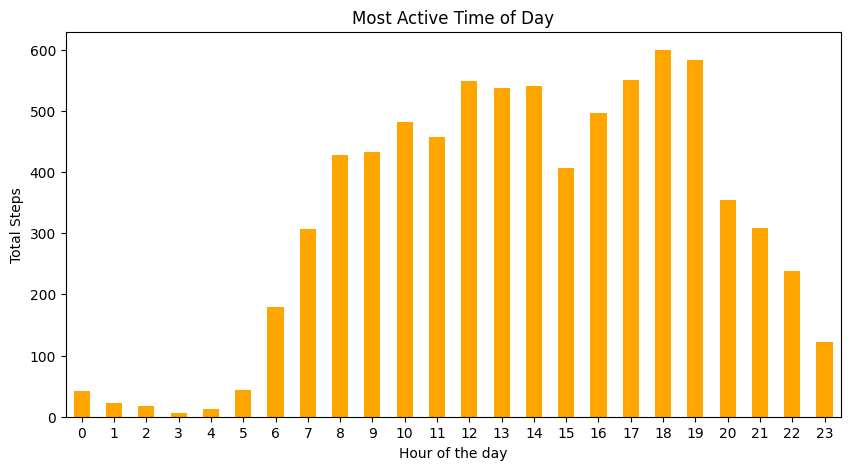

In [60]:
fig, axs = plt.subplots(figsize=(10, 5))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='Orange', title='Most Active Time of Day')
plt.xlabel("Hour of the day")
plt.ylabel("Total Steps")
plt.show()

<span style="font-size:1.1em;">This chart tells us that the users tend to start becoming more active between 6 and 8 am. The level of activity stays doesn't change dramatically throughout the day, but the peak hours seem to occur between 5 and 7 pm. Our users are likely choosing to work out after work/school hours.

<span style="font-size:1.1em;">Note that their levels of activity start decreasing significantly at 8 pm and keep going down as the hours progress. The users seem to go to bed at a reasonable time, as lower levels of activity are recorded at late hours of the night.

**<span style="font-size:1.2em;">Visualizing the Time of Day Users Burn the Most Calories**

<span style="font-size:1.1em;">We learned from a previous visualization that there is a positive correlation between the total amount of steps walked and burned calories. Let's see if the burned calories are fluctuating as much as the activity levels.

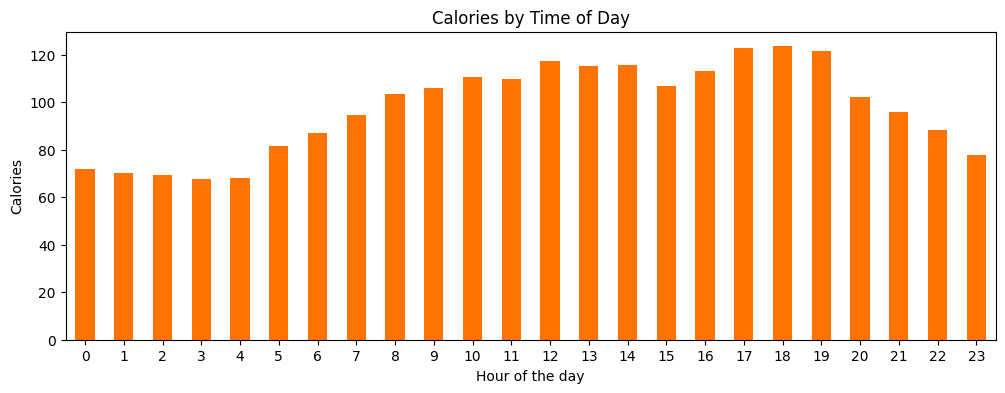

In [61]:
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, color='#FF7300', title='Calories by Time of Day')
plt.xlabel("Hour of the day")
plt.ylabel("Calories")
plt.show()

**<span style="font-size:1.2em;">Visualizing the Average of Minutes Spent in Each Activity Category**

<span style="font-size:1.1em;">We can visualize the distribution of time in percentages by plotting the following pie chart:

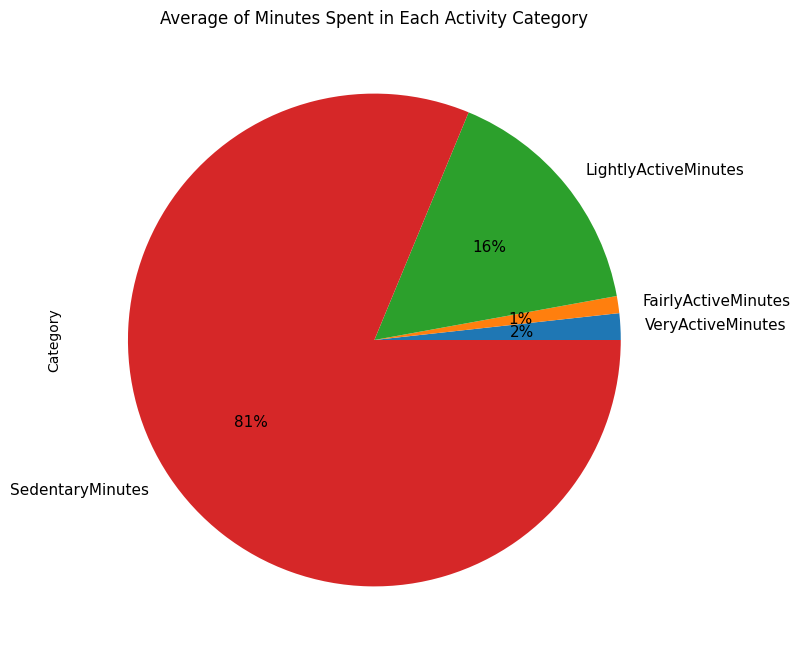

In [62]:
minutes_categories = data_merged[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories.plot.pie(ylabel='Category', title='Average of Minutes Spent in Each Activity Category',autopct='%1.0f%%', fontsize='11', startangle=0, figsize=(10,8))
plt.show()

**<span style="font-size:1.2em;">Visualizing Total Minutes Asleep x Total Time in Bed**

<span style="font-size:1.1em;">We can use a scatter plot to better visualize the relationship between TotalMinutesAsleep and TotalTimeInBed:

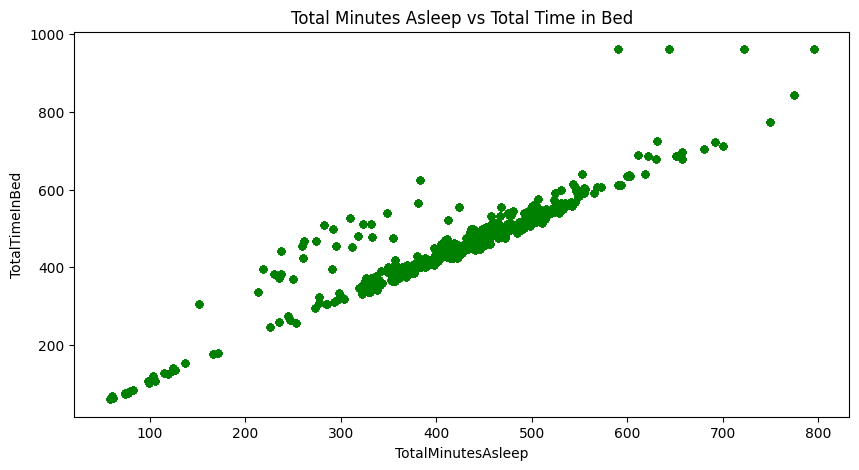

In [65]:
data_merged.plot.scatter(x='TotalMinutesAsleep', y='TotalTimeInBed', color='green', alpha=0.6, figsize=(10,5))
plt.title('Total Minutes Asleep vs Total Time in Bed')
plt.show()

**<span style="font-size:1.2em;">Visualizing the Average of Minutes Asleep by Day of the Week**

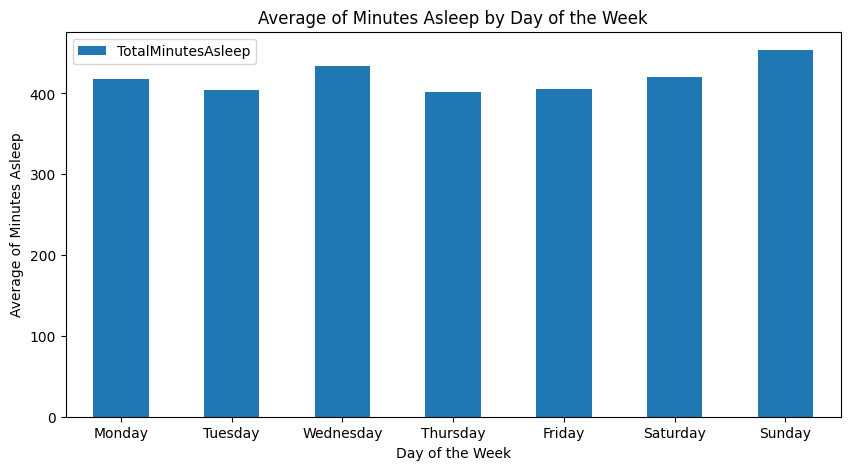

In [66]:
df_weekday['TotalMinutesAsleep'].plot.bar(xlabel='Day of the Week', ylabel='Average of Minutes Asleep', title='Average of Minutes Asleep by Day of the Week', legend=True, rot=0, figsize=(10,5))
plt.show()

<span style="font-size:1.1em;">In the column chart above, we can see that the average Total Minutes Asleep goes above the 400-minute mark - **419.8 minutes** to be exact - with **Sunday (7.6 hours)** and **Wednesday (7.2 hours)** being the days where the users seem to have slept the most. It is clear from this visualization that there are no significant changes in sleeping time throughout the week. This information shows us that the users have a consistent sleeping schedule.

<span style="font-size:1.1em;">By analyzing the chart above, we can see that Sunday records the highest number of the Total Minutes Asleep average. If we go back to the **"Average of Total Steps by Day of the Week"** graph, we learn that Sunday also recorded the lowest number of the total steps average in the week, showing us that Sunday is likely the users' choice of a rest day.

**<span style="font-size:1.2em;">Visualizing Awake Time in Bed by Day of the Week**


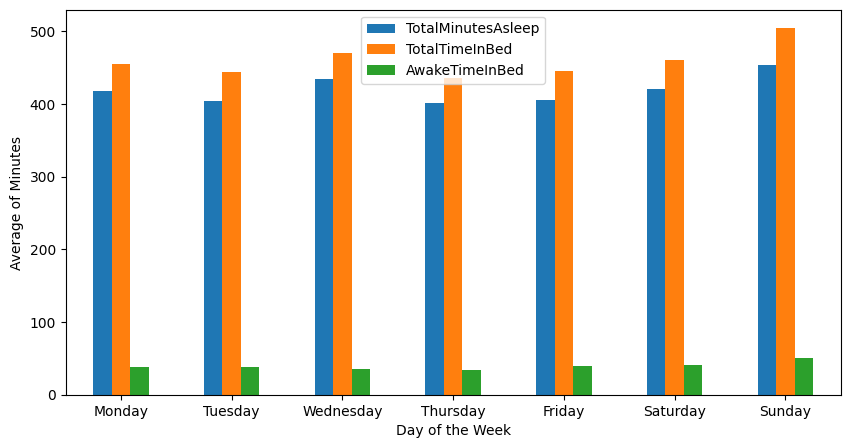

In [67]:
# Plotting the Graph
time_bed.plot.bar(xlabel='Day of the Week', ylabel='Average of Minutes', rot=0, figsize=(10,5))
plt.show()

# **RECOMMENDATION**

-**Targeted Marketing Campaigns:**
We propose tailoring campaigns to specific consumer segments. Messages that are tailored to specific groups' preferences will resonate more effectively.

-**Promotion of key features:**
Highlighting key product features is critical. We recommend focusing on functionalities that directly address consumer needs and challenges.

-**Engagement via Social Media:**
Social media is an effective tool for engaging our target audience. Let us share success stories and encourage users to share their experiences with our platforms.

-**Influencer Collaborations:**
Partnering with fitness influencers can help us expand our reach. They can show how HealthTrackers products integrate seamlessly into everyday life.

# **Summary:**
Our analysis was geared towards unearthing trends in FitBit app usage, deciphering patterns in physical activity, heart rate, and sleep monitoring. Exploring the impact of different Fitbit trackers and variations in user behaviors, our analysis sought to provide a comprehensive understanding of user engagement.